In [4]:
import pandas
import re

from time import time

from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

url = 'data-pre-processing.csv'
dataframe = pandas.read_csv(url)

tokenizer = RegexpTokenizer("[\w']+")
stemmer = PorterStemmer()
vectorizer = TfidfVectorizer(stop_words='english')

corpus = []
corpusOriginal = []
corpusClassification = []

for videoId,author,date,content,classification in dataframe.values:
    comment = []
    corpusOriginal.append(content)
    content = content.lower()
    content = re.sub('(\s|\<)br\s*.\>', '', content)
    content = re.sub('(href.*)?http(.*)(\.com)?', 'HTTPWEBSITE', content)
    content = re.sub('[^A-Za-z0-9\s]+', '', content)
    corpusClassification.append(classification)
    for word in tokenizer.tokenize(content):
            word = stemmer.stem(word)
            comment.append(word)
    corpus.append(" ".join(comment))

print("Creating bag of words - vectorizer.fit_transform")
print(len(corpus))

vectorized =  vectorizer.fit_transform(corpus)

Creating bag of words - vectorizer.fit_transform
1956


Split and Merge - Creating Co-Association Matriz
Name k_means_youtube_1_12:
- Done fit in 10.794s
- Done voting in 3.176s
Name k_means_youtube_2_6:
- Done fit in 8.019s
- Done voting in 3.368s
Name k_means_youtube_3_41:
- Done fit in 19.218s
- Done voting in 4.726s
Name k_means_youtube_4_30:
- Done fit in 20.581s
- Done voting in 3.291s
Name k_means_youtube_5_13:
- Done fit in 10.065s
- Done voting in 3.121s
Name k_means_youtube_6_43:
- Done fit in 26.245s
- Done voting in 3.976s
Name k_means_youtube_7_14:
- Done fit in 11.093s
- Done voting in 3.125s
Name k_means_youtube_8_14:
- Done fit in 11.839s
- Done voting in 3.156s
Name k_means_youtube_9_27:
- Done fit in 18.023s
- Done voting in 5.951s
Name k_means_youtube_10_27:
- Done fit in 22.376s
- Done voting in 3.713s
Name k_means_youtube_11_12:
- Done fit in 10.753s
- Done voting in 3.094s
Name k_means_youtube_12_37:
- Done fit in 18.984s
- Done voting in 3.092s
Name k_means_youtube_13_8:
- Done fit in 11.487s
- Done voting in 5.104s
N

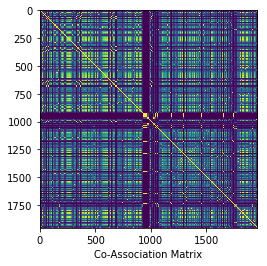

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle

from sklearn.cluster import KMeans, MiniBatchKMeans

print("Split and Merge - Creating Co-Association Matriz")

co_association = np.zeros((len(vectorized.toarray()), len(vectorized.toarray())))
max_k = 50
max_part = 70
vote = 1 / max_part

#Defining the estimators
estimators = []
for x in range(1, max_part + 1): #Closed range
    k = random.randint(2, max_k)
    key = 'k_means_youtube_' + str(x) + '_' + str(k)
    estimators.append((key, KMeans(n_clusters=k)))

#Split
for name, est in estimators:
    print("Name %s:" % (name))
    t0 = time()
    est.fit(vectorized.toarray())
    labels = est.labels_
    print("- Done fit in %0.3fs" % (time() - t0))
    
    #Combine
    t0 = time()
    res = np.array([[int(i == j) for i in labels] for j in labels])
    res = res * vote
    co_association = co_association + res
    print("- Done voting in %0.3fs" % (time() - t0))

pickle.dump(co_association, open("co_association-youtube.p", "wb"))
plt.xlabel('Co-Association Matrix')
plt.imshow(co_association)
plt.show()

In [41]:
from sklearn.cluster import AgglomerativeClustering

ward_max_clusters = 13

ward = AgglomerativeClustering(n_clusters=ward_max_clusters, linkage='ward')
ward.fit(co_association)
labels = ward.labels_

for i in range(0, ward_max_clusters):
    print("Cluster - %d" % (i))
    for index, original in enumerate(corpusOriginal):
        if labels[index] == i:
            print("%d --> %s" % (i, original))
    print()

Cluster - 0
0 --> Oppa! Yeah! Best Song!ï»¿
0 --> reminds me of this song https://soundcloud.com/popaegis/wrenn-almond-eyesï»¿
0 --> I found out this song nowï»¿
0 --> Song name??ï»¿
0 --> Still the best. :Dï»¿
0 --> Loool nice song funny how no one understands (me) and we love itï»¿
0 -->  I hate this song! ï»¿
0 --> I love this song, itÂ´s for empowering every woman :)  "youÂ´re gonna hear me roar" 	)ï»¿
0 --> This song makes me want to drink bleachï»¿
0 --> I'm not a big fan of the song but this video is awesome!ï»¿
0 --> This looks so fun and it's a good songï»¿
0 --> Check out our vids, our songs are awesome! And that I guarantee :)ï»¿
0 --> Roar is without a doubt your best song...feel good song with a message for  everyone. Good job Katyï»¿
0 --> great song you go katy!ï»¿
0 --> This Song Was Good Until It Got Overplayed The Hell Out Of On Radioï»¿
0 --> Great.This is a songï»¿
0 --> This is the best of the best video in world!!!!!!!!!!!!!!!!!!!!!!!!!!!!!ï»¿
0 --> Nice songï»¿
0

2 --> CUTEÂ  :)ï»¿
2 --> I fuckin love this song!<br /><br /><br />After, I&#39	m sexy and I know it ï»¿
2 --> WELL THIS DUDES FADED THE FUCK OUT!ï»¿
2 --> i was born in the wrong generationï»¿
2 --> Likeeeeï»¿
2 --> i want to be that robot guy...ï»¿
2 --> Dance :)ï»¿
2 --> Who knows the name of that girl?.. and that one.. and that one...ï»¿
2 --> Why sooooo many downs?ï»¿
2 --> tensionâ¤´ï¸Žâ¤´ï¸Žï»¿
2 --> LIKKEEï»¿
2 --> Support the fight for your 4th amendment right to privacy in your home and business. Stop the NSA spying on Americans with the un Patriot Act Renewal. Rand Paul has spent 10.5 hours on the Senate floor in a Protest and Filibuster fighting for ourÂ  Constitution that this Nation is founded on. Join the fight at Rand Paul dot com. Spread The Word. We Have Someone That Cares About Our Nation.Â  Email your Senators, Congress men and women, tell them to support Rand. Tell the news to support Rand too. Senator Rand Paul was up until <a href="http://www.youtube.com/watch?v=

12 --> and u should.d check my channel and tell me what I should do next!ï»¿
12 --> CHECK OUT MY CHANNEL
12 --> sub my channel for no reason -_-ï»¿
12 --> Check my channel please! And listen to the best music ever :Pï»¿
12 --> Pls follow this channel!! http://www.twitch.tv/sevadusï»¿
12 --> hi guys check my youtube channelï»¿
12 --> Sub my channel!ï»¿
12 --> Check my channelï»¿
12 --> Suscribe My Channel Please XD lolï»¿
12 --> There is one video on my channel about my brother...ï»¿
12 --> Check my channel, please!ï»¿
12 --> Plizz withing my channel ï»¿
12 --> Sub to my channel visuelgamingzNL I sub backï»¿
12 --> Hi everyone! Do you like music? Then why not check out my music channel.  The LEXIS band will be uploading their own songs and covers soon so don't  miss out. Please SUBSCRIBE too as it does help us out a lot. Just takes one  click. -&gt	ï»¿
12 --> Suscribe my channel pleaseï»¿
12 --> check out "starlitnightsky" channel to see epic videosï»¿
12 --> CHECK MY CHANNEL OUT PLEASE

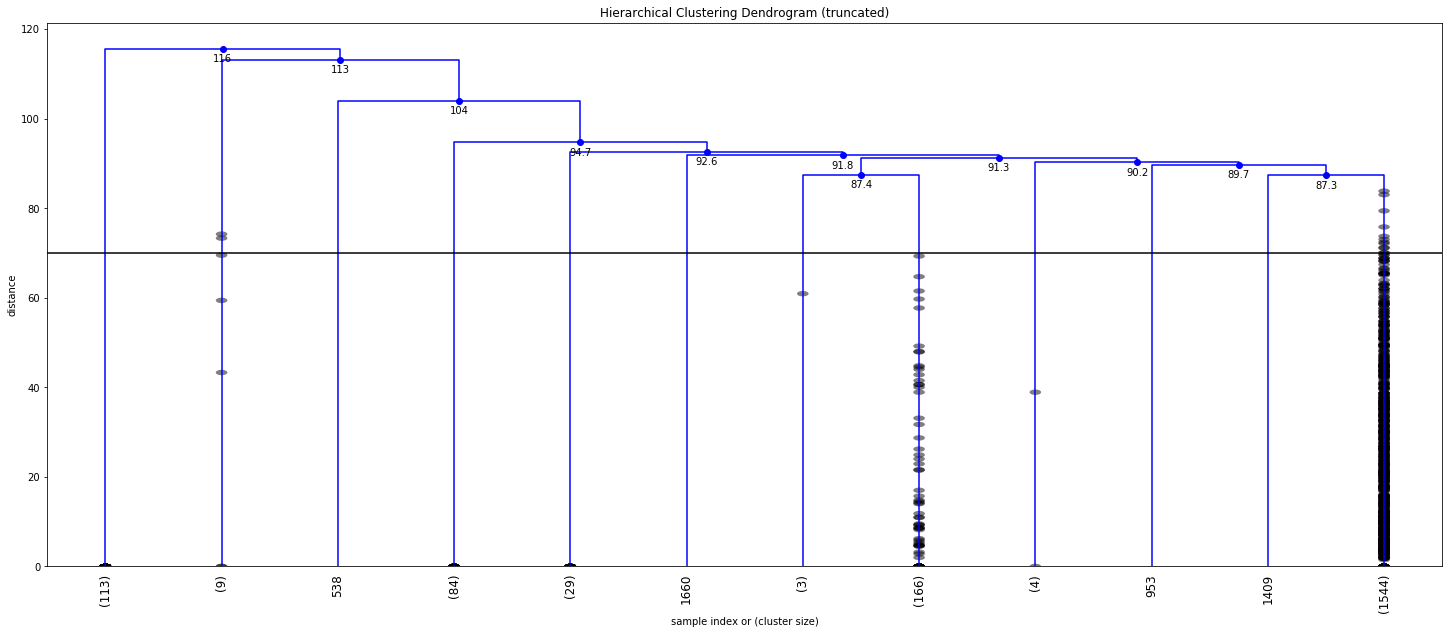

Cluster - 0

Cluster - 1
1 --> Check my first video outï»¿
1 --> Check out this video on YouTube:ï»¿
1 --> Check out this video on YouTube:ï»¿
1 --> Check out this video on YouTube:<br />ï»¿
1 --> Check out this video on YouTube:ï»¿
1 --> Check out this video on YouTube:ï»¿
1 --> Take a look at this video on YouTube:ï»¿
1 --> Check out this video on YouTube:ï»¿
1 --> Check out this video on YouTube:ï»¿
1 --> Check out this video on YouTube:ï»¿
1 --> Check out this video on YouTube:ï»¿
1 --> Check out this video on YouTube:<br /><br /><br /><br />ï»¿
1 --> Check out this video on YouTube:ï»¿
1 --> Check out this video on YouTube:ï»¿
1 --> Check out this video on YouTube:ï»¿
1 --> Check out this video on YouTube:ï»¿
1 --> Check out this video on YouTube:ï»¿
1 --> Check out this video on YouTube:ï»¿
1 --> Check out this video on YouTube:ï»¿
1 --> Check out this video on YouTube:ï»¿
1 --> Check out this video on YouTube: ï»¿
1 --> Check out this video on YouTube:ï»¿
1 --> Check out this vi

18 --> this jap is such a piece of shit. he is such a worthless fish head. i dont  know how any one likes this dumb untanlted gook. this isnt even fucken  music. this is so fucking sad that this is even such thing. people are so  fucked up.ï»¿
18 --> I remember when everyone was obsessed with Gangnam Style ðŸ˜—ï»¿
18 --> Remove This video its wankï»¿
18 --> It's so hard, sad :( iThat little child Actor HWANG MINOO dancing very  active child is suffering from brain tumor, only 6 month left for him .Hard  to believe .. Keep praying everyone for our future superstar.  #StrongLittlePsY #Fighting  SHARE EVERYONE PRAYING FOR HIM http://ygunited.com/2014/11/08/little-psy-from-the-has-brain-tumor-6-months-left-to-live/ ï»¿
18 --> Why the fuck this keeps updated? Comments :"5 minutes ago" Song: "2 years and  4 months ago"ï»¿
18 --> MANY MEMORIES...........ï»¿
18 --> why are they 5million comments when there is only 279.898 youtube Users.   5million fake account or PSY hacked youtubeï»¿
18 --> 2

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# calculate full dendrogram
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
max_d = 70
Z = linkage(co_association, 'single', metric="cityblock")

plt.figure(figsize=(25, 10))
plt.title('Dendrogram - SL over Co-Association Matrix')
plt.ylabel('Distance')
fancy_dendrogram(
    Z,
    max_d=max_d,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12., # font size for the x axis abels,
    show_contracted=True  # to get a distribution impression in truncated branches
)
plt.show()

clusters = fcluster(Z, max_d, criterion='distance')
clusters_labels = max(clusters) + 1
for i in range(0, clusters_labels):
    print("Cluster - %d" % (i))
    for index, original in enumerate(corpusOriginal):
        if clusters[index] == i:
            print("%d --> %s" % (i, original))
    print()


In [21]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata